Multi agent Deep Deterministic Policy Gradient

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

sub_folder = 'model_metric_data/ddpg'

model_folder = f'{sub_folder}/1000ep1000resources50rps1000interval0.75alpha'
ep_summed_rewards_df = pd.read_csv(f'{model_folder}/ep_summed_rewards.csv')
ep_latencies_df = pd.read_csv(f'{model_folder}/ep_latencies.csv')
# resource_dev_df = pd.read_csv(f'{model_folder}/resource_dev.csv')

num_agents = 3
agent_ep_summed_rewards = []
for agent_idx in range(num_agents):
    filename = f'{model_folder}/agent_{agent_idx}_ep_summed_rewards.csv'
    agent_rewards_df = pd.read_csv(filename)
    agent_ep_summed_rewards.append(agent_rewards_df)

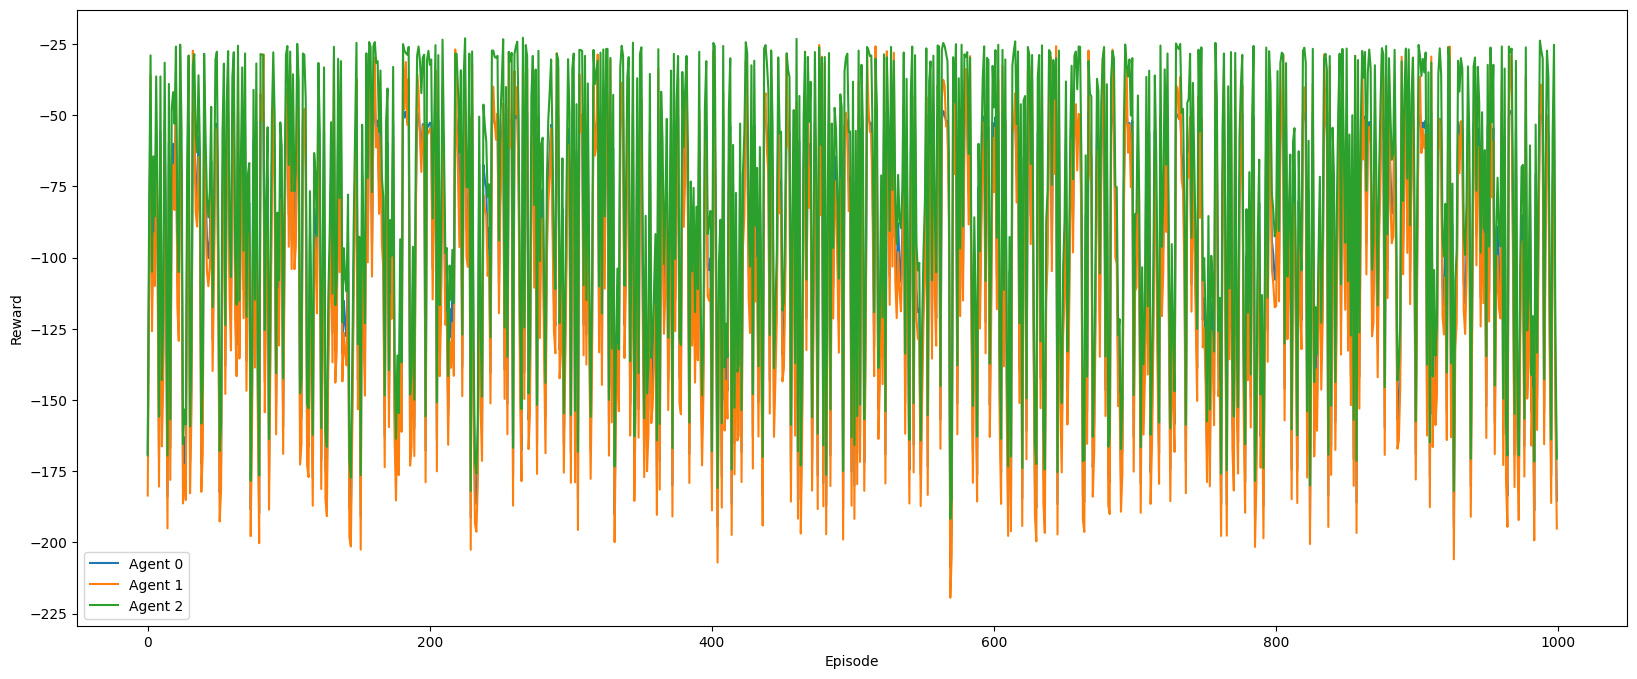

In [18]:
fig, ax = plt.subplots(figsize=(20, 8))
for i in range(len(agent_ep_summed_rewards)):
    ax.plot(agent_ep_summed_rewards[i]['Episode'], agent_ep_summed_rewards[i]['Reward'], label=f'Agent {i}')
ax.set_xlabel('Episode')
ax.set_ylabel('Reward')
ax.legend()
plt.show()


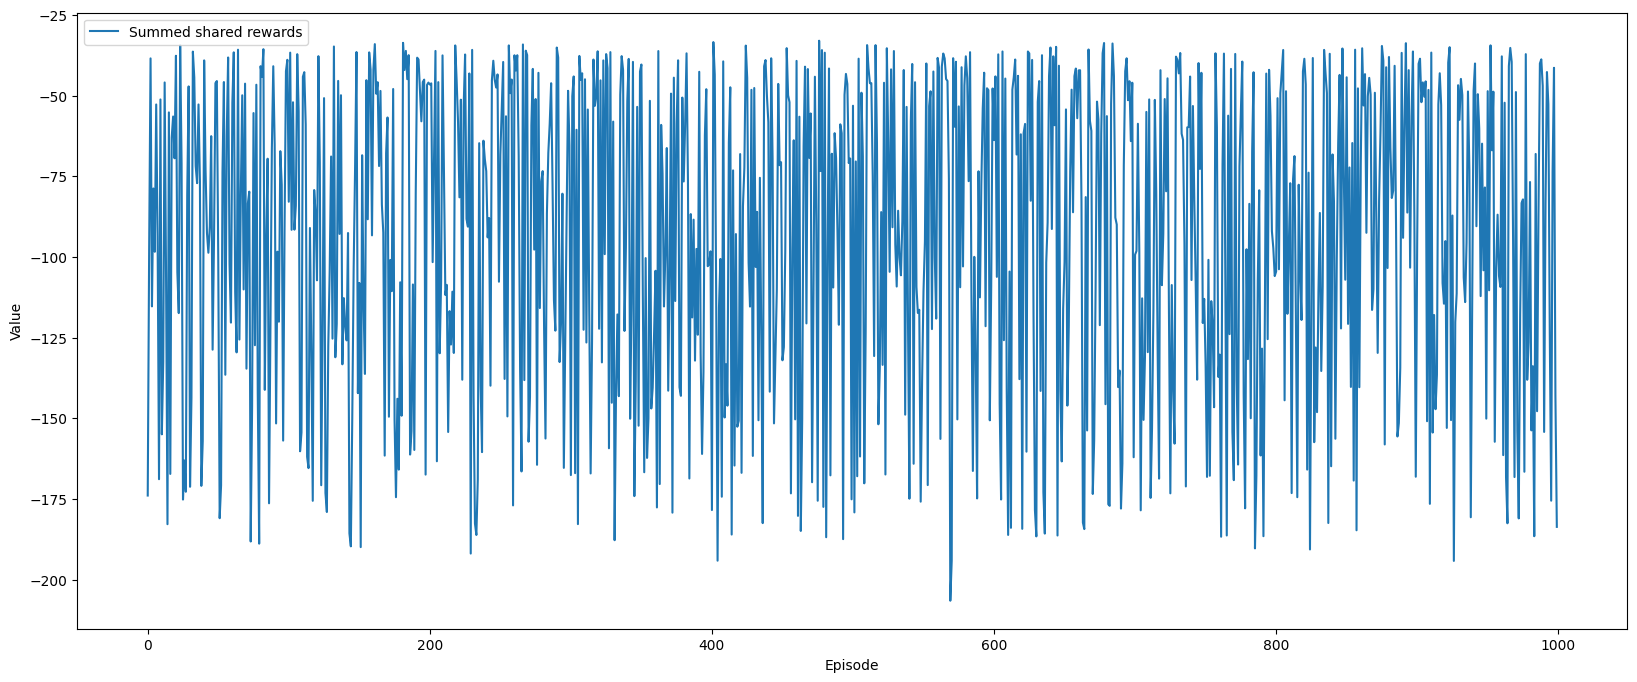

In [19]:
fig, ax = plt.subplots(figsize=(20, 8))
plt.plot(ep_summed_rewards_df['Reward'], label='Summed shared rewards')
plt.xlabel('Episode')
plt.ylabel('Value')
plt.legend()
plt.show()


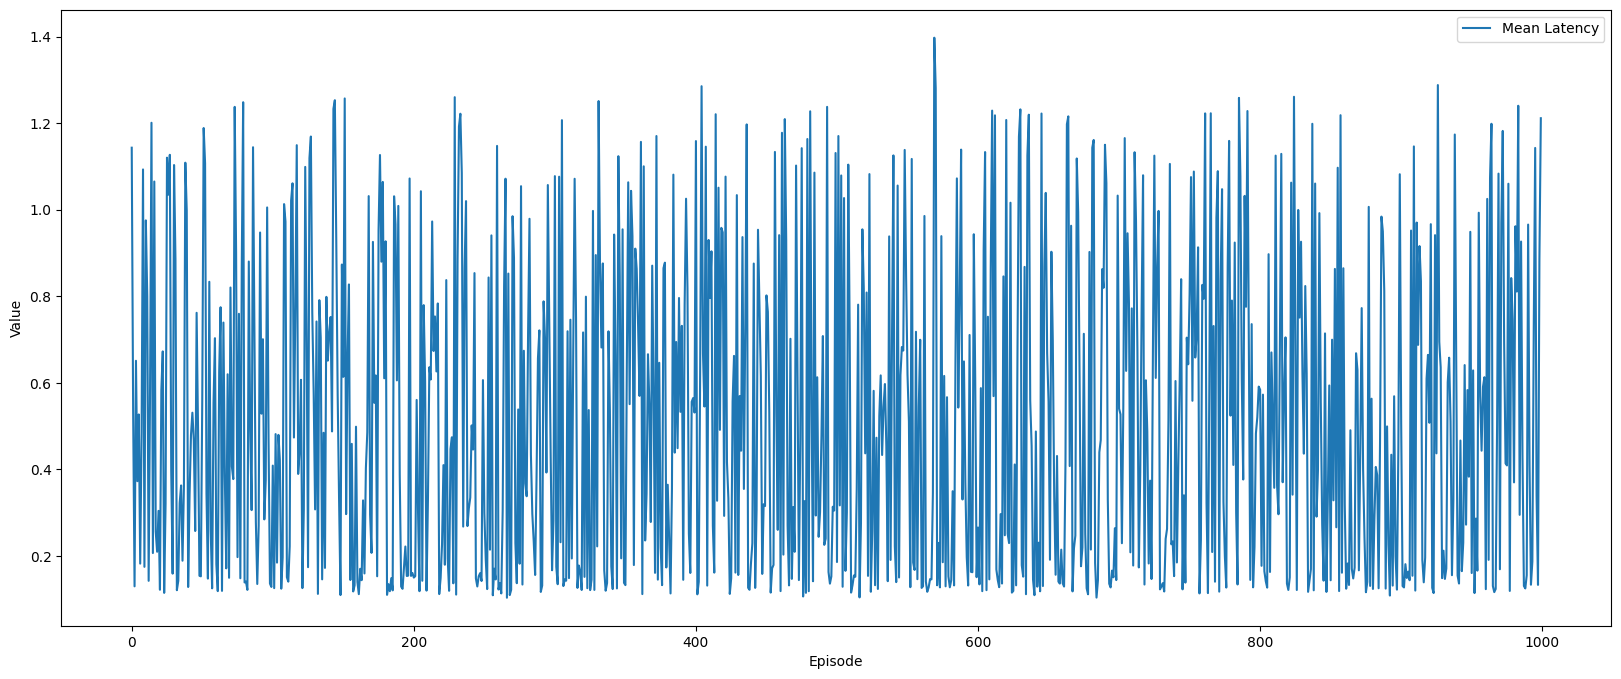

In [20]:
fig, ax = plt.subplots(figsize=(20, 8))
plt.plot(ep_latencies_df['Mean Latency'], label='Mean Latency')
plt.xlabel('Episode')
plt.ylabel('Value')
plt.legend()
plt.show()

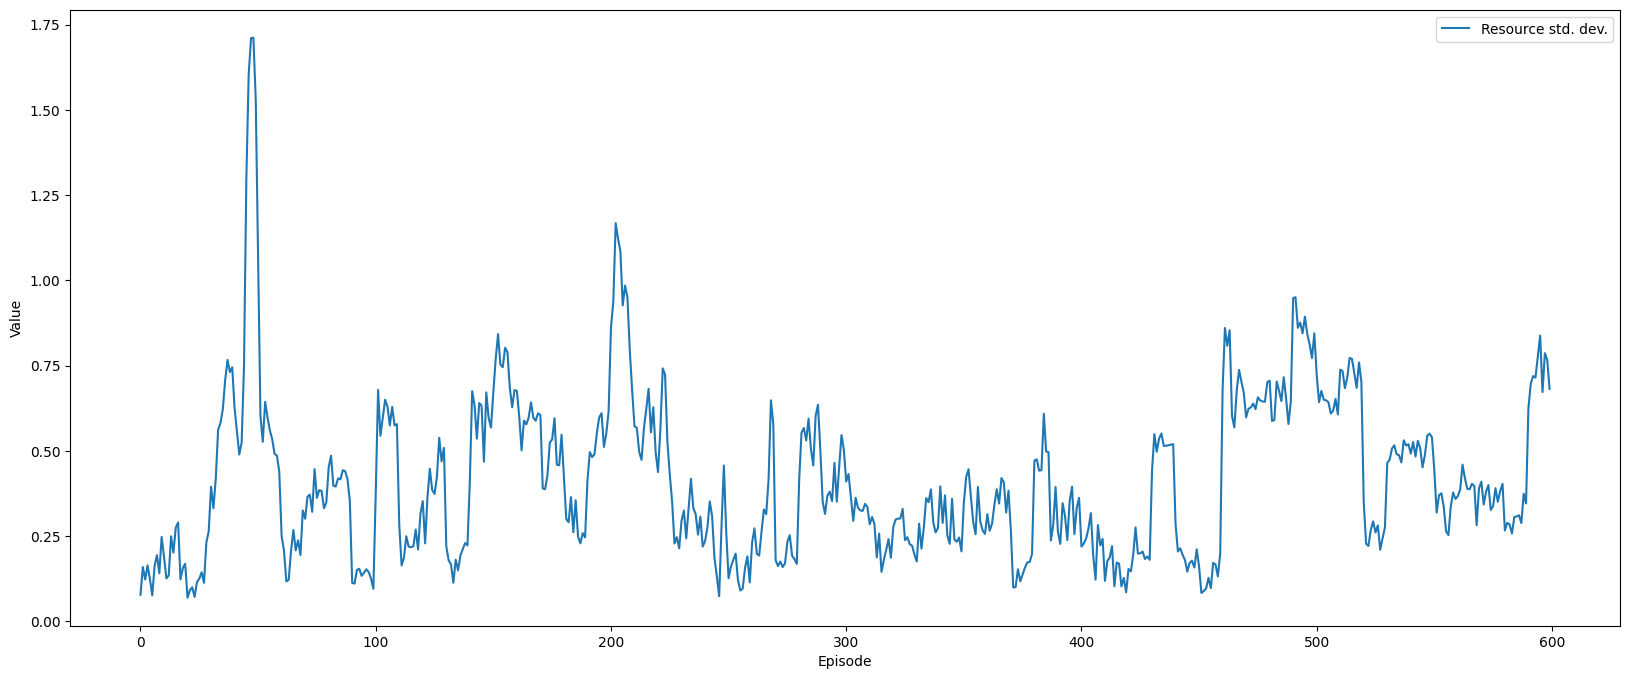

<module 'matplotlib.pyplot' from '/home/jprodanov/resource-elastisity-nancy/venv/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [6]:
fig, ax = plt.subplots(figsize=(20, 8))
plt.plot(resource_dev_df['Deviation'], label='Resource std. dev.')
plt.xlabel('Episode')
plt.ylabel('Value')
plt.legend()
plt.show()
plt

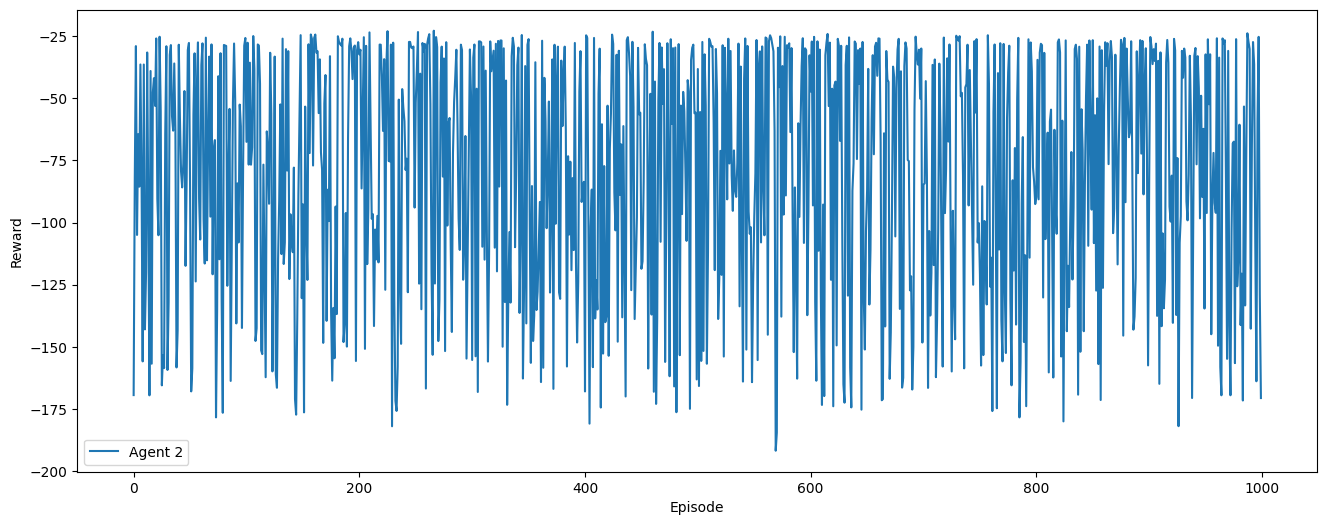

In [21]:
fig, ax = plt.subplots(figsize=(16, 6))
# for i in range(len(agent_ep_summed_rewards)):
agent = 2
ax.plot(agent_ep_summed_rewards[agent]['Episode'], agent_ep_summed_rewards[agent]['Reward'], label=f'Agent {agent}')
ax.set_xlabel('Episode')
ax.set_ylabel('Reward')
ax.legend()
plt.show()
